# VERİ TANIMI

***Company:*** Laptopun markası

***TypeName***: Laptonun türü

***Inches:*** Laptonun kaç inç olduğu bilgisi

***ScreenResolution:*** Laptopun ekran özellikleri ve çözünürlüğü

***Cpu:*** İşlemci bilgileri

***Ram:*** GB cinsinden ram boyutu

***Memory:*** Depolama boyutu ve aygıtı bilgisi

***Gpu:*** Ekran kartı bilgileri

***OpSys:*** İşletim sistemi türü

***Weight:*** Ağırlık bilgisi

***Price:*** Fiyat

# Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

import scipy.stats as stats
import pylab

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.stats.api as sms

from sklearn.tree import DecisionTreeRegressor
from skompiler import skompile

from sklearn.ensemble import RandomForestRegressor

# Veriye Genel Bakış

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
# 'Unnamed: 0' adlı değişkeni atıyoruz

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
print("Sütunlara göre eksik veri sayıları:\n")

df.isnull().sum()

Sütunlara göre eksik veri sayıları:



Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
print("Aynı değerlere sahip satır sayısı:\n")

df.duplicated().sum()

Aynı değerlere sahip satır sayısı:



29

In [8]:
df=df.drop_duplicates()

In [9]:
print("Aynı değerlere sahip satır sayısı:\n")

df.duplicated().sum()

Aynı değerlere sahip satır sayısı:



0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [11]:
kat_deg = df.select_dtypes(include=['object']).columns
sur_deg = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

kat_deg, sur_deg

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [12]:
# GB ve kg string ifadelerini kaldırma

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# Ram ve Weight değişkenlerinin veri tiplerini dönüştürme

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,15.022449,1.429940,10.10,14.0000,15.60,15.60,18.40
Ram,1274.0,8.444270,5.098291,2.00,4.0000,8.00,8.00,64.00
Weight,1274.0,2.040399,0.669444,0.69,1.5000,2.04,2.31,4.70
Price,1274.0,60503.185074,37333.222977,9270.72,32495.6052,52693.92,79773.48,324954.72


# Veri Analizi

## Genel Analiz

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Fiyat Değişkeni Dağılımı')]

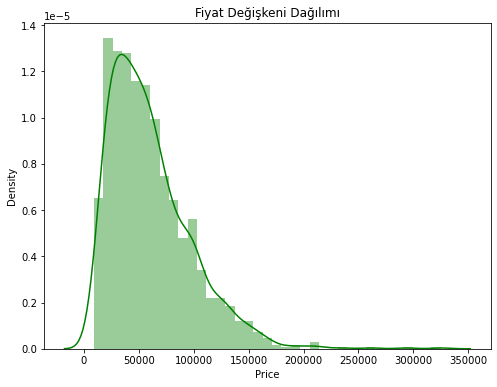

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'],color='green').set(title='Fiyat Değişkeni Dağılımı')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\li

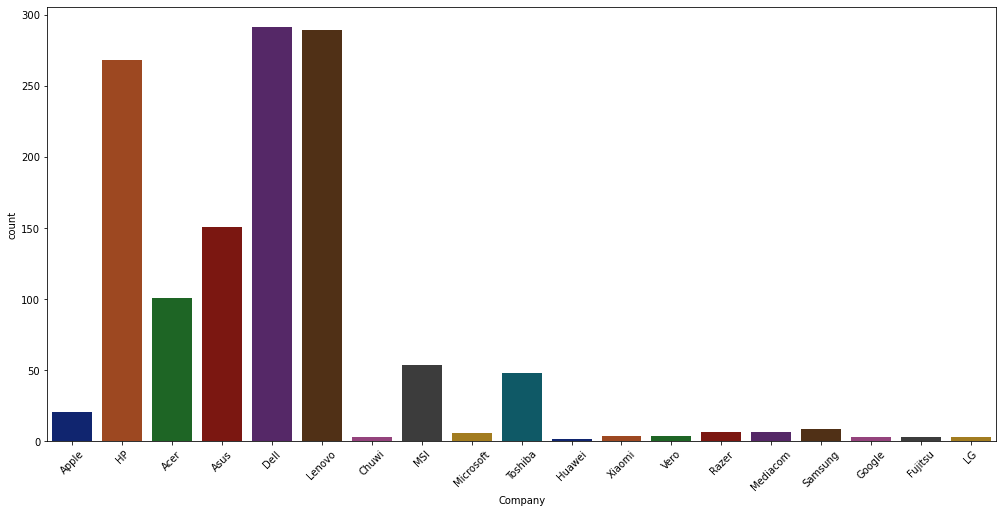

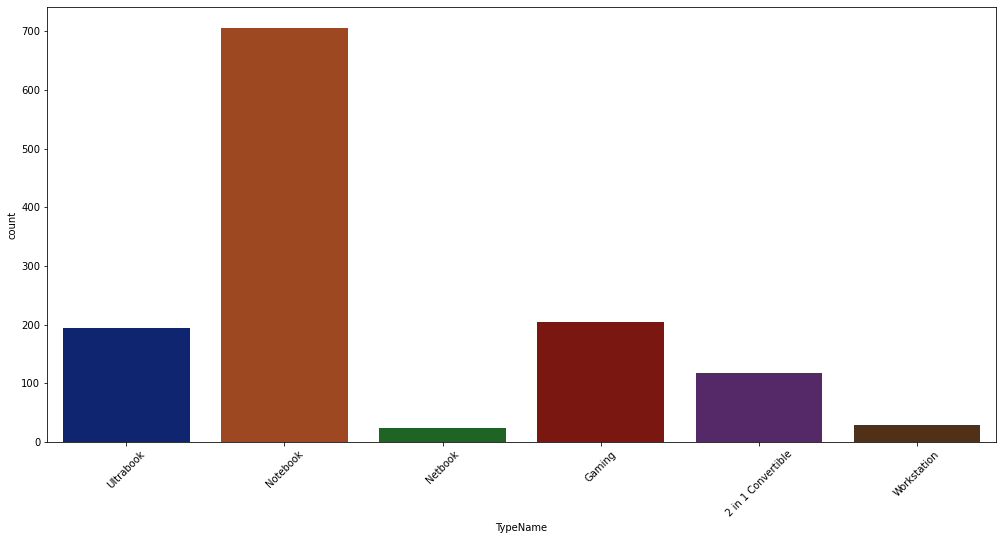

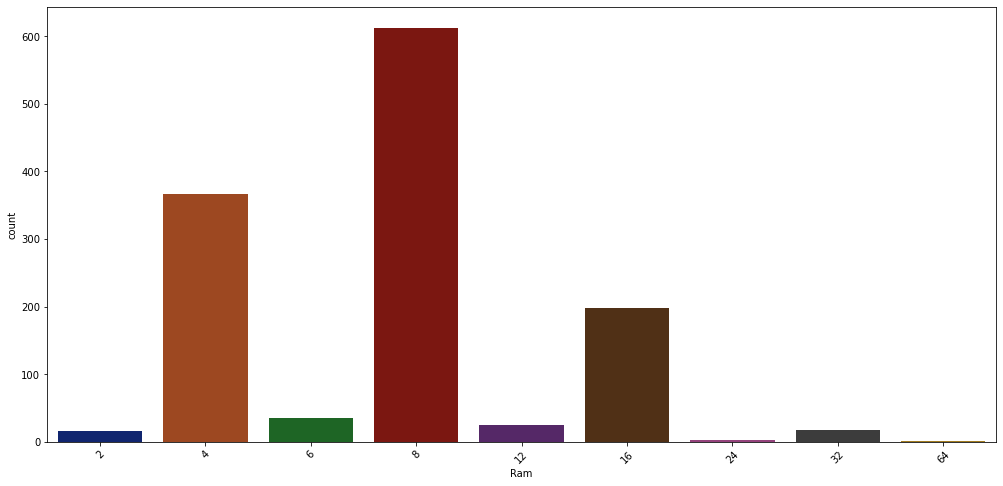

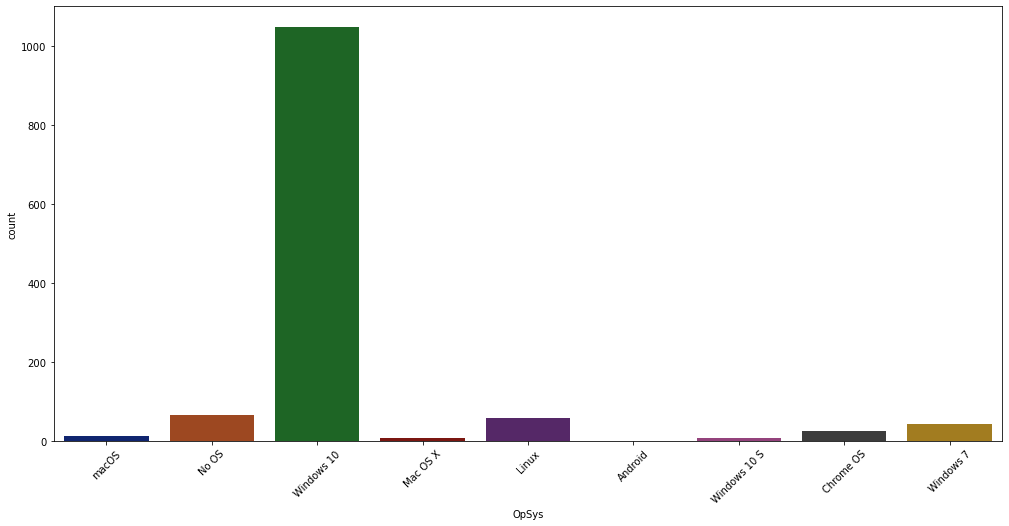

In [16]:
# Kategorik değişkenler için 'countplot' lar

def grafik(degerler):
    plt.figure(figsize=(17,8))
    sns.countplot(df[degerler], palette='dark')
    plt.xticks(rotation=45)
    
degiskenler = ['Company', 'TypeName','Ram','OpSys']
for degerler in degiskenler:
    grafik(degerler)

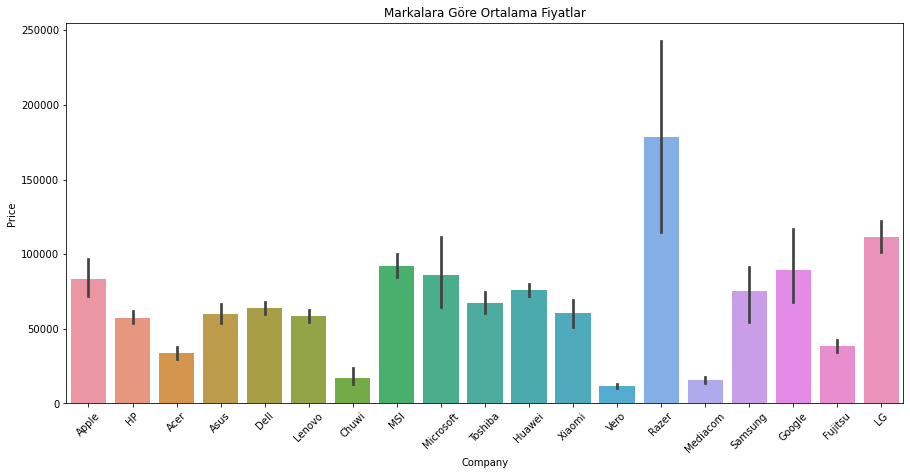

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x = df['Company'],y = df['Price']).set(title='Markalara Göre Ortalama Fiyatlar')
plt.xticks(rotation = '45')
plt.show()

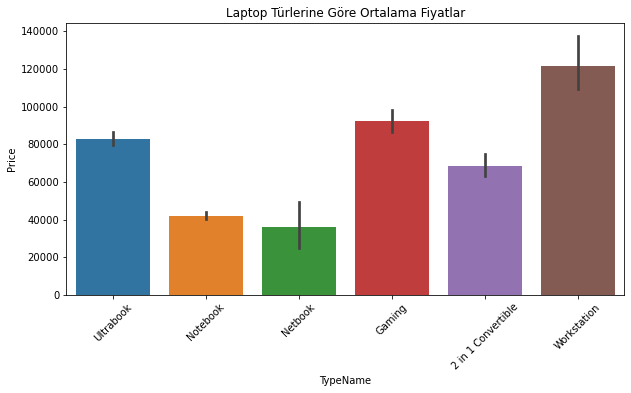

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['TypeName'],y = df['Price']).set(title='Laptop Türlerine Göre Ortalama Fiyatlar')
plt.xticks(rotation = '45')
plt.show()

[Text(0.5, 1.0, 'İnç ve Fiyat İlişkisi')]

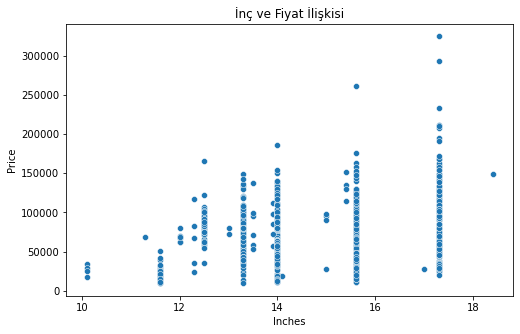

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Inches'],y = df['Price']).set(title='İnç ve Fiyat İlişkisi')

## Değişken Analizleri

### ScreenResolution

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [21]:
# Laptop'un touchscreen özelliğinin olup olmadığını baz alarak yeni değişken oluşturma

df['TouchScreen'] = df['ScreenResolution'].apply(lambda degerler:1 
                                                      if 'Touchscreen' in degerler else 0)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
945,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.72,0
98,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,6,256GB SSD,Nvidia GeForce 920M,Windows 10,2.00,30742.56,0
47,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,69210.72,0
161,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,42890.40,0
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,78801.12,0


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

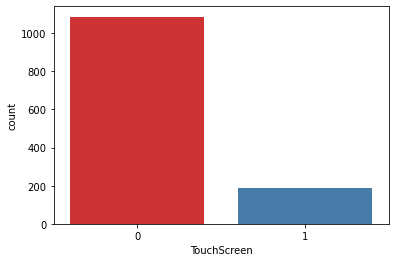

In [22]:
sns.countplot(df['TouchScreen'], palette='Set1')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

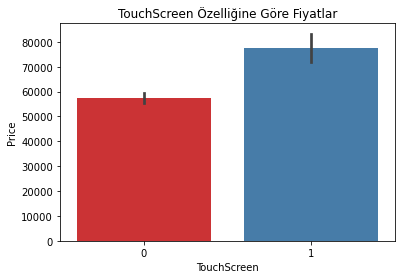

In [23]:
sns.barplot(x = df['TouchScreen'], y = df['Price'], palette='Set1').set(title='TouchScreen Özelliğine Göre Fiyatlar')
plt.xticks(rotation = 'horizontal')

In [24]:
# Laptop'un IPS özelliğinin olup olmadığını baz alarak yeni değişken oluşturma

df['IPS'] = df['ScreenResolution'].apply(
    lambda degerler:1 if "IPS" in degerler else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
373,Lenovo,Notebook,17.3,1600x900,AMD A8-Series 7410 2.2GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.60,26053.920,0,0
660,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.56,65481.120,0,0
126,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,1.63,43263.360,0,0
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783.520,0,0
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.496,0,0


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

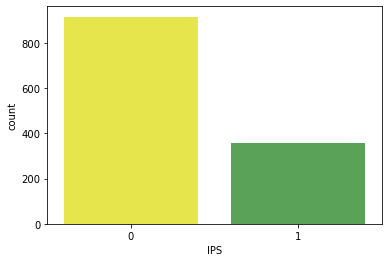

In [25]:
sns.countplot(df['IPS'], palette='Set1_r')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

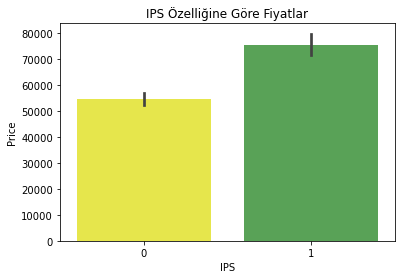

In [26]:
sns.barplot(x = df['IPS'], y = df['Price'], palette='Set1_r').set(title='IPS Özelliğine Göre Fiyatlar')
plt.xticks(rotation = 'horizontal')

In [27]:
# x ve y çözünürlüklerine göre yeni değişkenler oluşturma

cozunurluk_df = df['ScreenResolution'].str.split('x',n = 1,expand=True)
cozunurluk_df.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
df['X_coz'] = cozunurluk_df[0]
df['Y_coz'] = cozunurluk_df[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_coz,Y_coz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
# 'X_coz'sütununu karakterlerden arındırma işlemi

df['X_coz']=df.X_coz.str.extract(r'(\d+.\d+)')

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_coz,Y_coz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_coz             1274 non-null   object 
 14  Y_coz             1274 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 149.3+ KB


In [32]:
df['X_coz'] = df['X_coz'].astype('int')
df['Y_coz'] = df['Y_coz'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_coz             1274 non-null   int32  
 14  Y_coz             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


<AxesSubplot:>

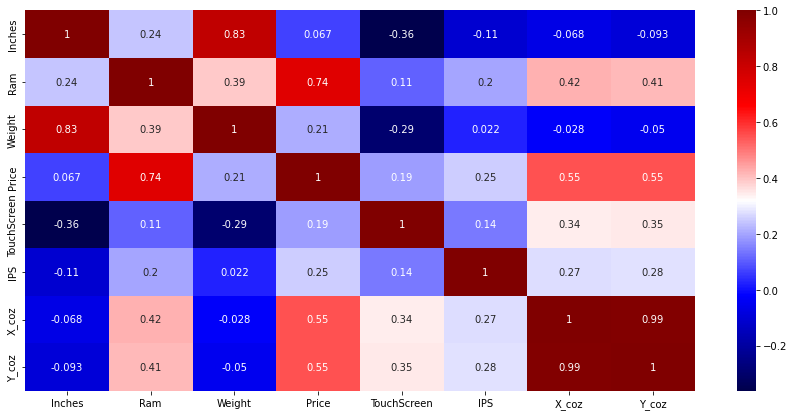

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='seismic')

In [34]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_coz          0.552074
Y_coz          0.548111
Name: Price, dtype: float64

**Yukarıdaki korelasyon matrisine baktığımızda `X_coz` ve `Y_coz` bağımsız değişkenleri arasında çok güçlü bir pozitif korelasyon görüyoruz. Bunun anlamı, bu iki bağımsız değişken arasında çok güçlü, pozitif bir doğrusal ilişki olduğudur. Bu iki bağımsız değişkenin, bağımlı değişkenimiz olan `Price` değişkeni ile olan korelasyonuna baktığımızda aynı değere sahip olduklarını görüyoruz. Ayrıca `Inches` bağımsız değişkeni ile bağımlı değişkenimizin arasındaki korelasyonun çok düşük bir pozitif korelasyon olduğunu söyleyebiliriz. Dolayısıyla `X_coz` veya `Y_coz` değişkenlerinden birini ve 'Inches' değişkenini modelden çıkartabiliriz. Fakat ben bu 3 değişkeni kullanarak yeni bir değişken üretmeye karar verdim. Bu değişken `PPI`(Pixels per inch: İnç başına düşen piksel) olarak kısaltılmıştır. Bu kavram görüntü hassasiyetini ifade etmek için kullanılır. Değişken üretilirken aşağıdaki matematiksel formül kullanılmıştır.**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_Coz^2+Y_Coz^2}}{Inches}
$$

In [35]:
# PPI değişkeni oluşturma

df['PPI'] = (((df['X_coz']**2+df['Y_coz']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_coz,Y_coz,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [36]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_coz          0.552074
Y_coz          0.548111
PPI            0.469539
Name: Price, dtype: float64

***Bağımlı değişken ile korelasyonu yeterince güçlü olan yeni bir değişken elde ettik, 3 değişkeni tek değişkenle ifade edebildiğimizi söyleyebiliriz. Bu durumda diğer 3 değişkene ihtiyacımız kalmadı***

In [37]:
df.drop(columns=['ScreenResolution','Inches','X_coz','Y_coz'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### CPU

In [38]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [39]:
text='Intel Core i5 2.3GHz'
text.split()[:3]

['Intel', 'Core', 'i5']

In [40]:
' '.join(text.split()[:3])

'Intel Core i5'

In [41]:
df['CPU_isim'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
def islemci_tipi(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Diger Intel Islemciler'
        
        else:
            return 'AMD Islemci'
        
    
    
df['CPU_isim'] = df['CPU_isim'].apply(lambda text:islemci_tipi(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Islemci'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Diger Intel Islemciler')])

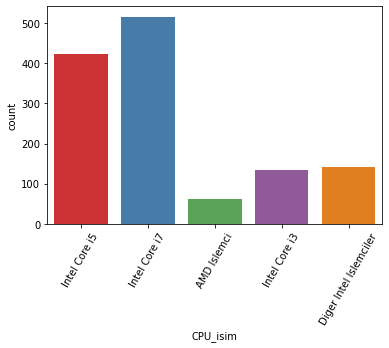

In [43]:
sns.countplot(df['CPU_isim'], palette='Set1')
plt.xticks(rotation = '60')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Islemci'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Diger Intel Islemciler')])

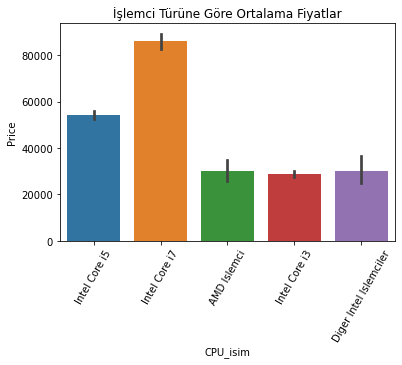

In [44]:
sns.barplot(df['CPU_isim'], df['Price']).set(title='İşlemci Türüne Göre Ortalama Fiyatlar')
plt.xticks(rotation = '60')

In [45]:
# Cpu sütununu kaldırma

df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### Ram

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

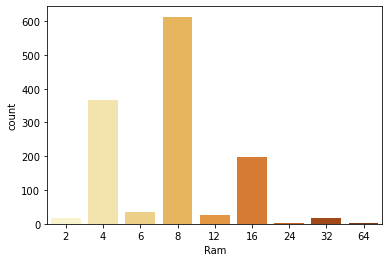

In [46]:
sns.countplot(df['Ram'], palette='YlOrBr')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Ram Boyutuna Göre Ortalama Fiyatlar')]

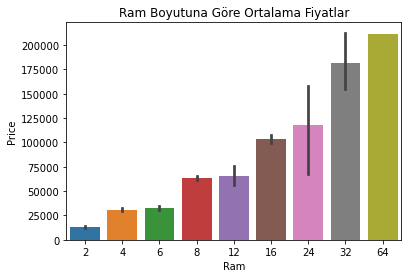

In [47]:
sns.barplot(df['Ram'], df['Price']).set(title='Ram Boyutuna Göre Ortalama Fiyatlar')

### Memory

In [48]:
print("Hafıza boyutları ve depolama aygıtları:\n")

df['Memory'].value_counts()

Hafıza boyutları ve depolama aygıtları:



256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
## 4 genel depolama aygıtı gözlemlenmiştir : HHD, SSD, Flash ,Hybrid

# Ondalık kısımları atma: 1.0 TB --> 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# GB ifadesini kaldırma

df['Memory'] = df['Memory'].str.replace('GB','')

# 1 TB=1024 GB olduğu için 'TB' yerine '000' yerleştiriyoruz

df['Memory'] = df['Memory'].str.replace('TB','000')

# '+' karakterinden öncesi ve sonrası olarak ayırma

yeni_df = df['Memory'].str.split("+", n = 1, expand = True)

yeni_df.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [50]:
df['yeni_df_ilk'] = yeni_df[0]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,yeni_df_ilk
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [51]:
def yeni_degiskenler(deger):
    
    df['ilk_var_mi '+deger] = df['yeni_df_ilk'].apply(lambda x:1 if deger in x else 0)
    
    
degerler = ['HDD','SSD','Hybrid','Flash Storage']    
for deger in degerler:
    yeni_degiskenler(deger)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,yeni_df_ilk,ilk_var_mi HDD,ilk_var_mi SSD,ilk_var_mi Hybrid,ilk_var_mi Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [52]:
# yeni_df_ilk sütunundan karakterleri kaldırma

df['yeni_df_ilk'] = df['yeni_df_ilk'].str.replace(r'\D', '')

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_13552\4077950241.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['yeni_df_ilk'] = df['yeni_df_ilk'].str.replace(r'\D', '')


In [53]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,yeni_df_ilk,ilk_var_mi HDD,ilk_var_mi SSD,ilk_var_mi Hybrid,ilk_var_mi Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0


In [54]:
df['yeni_df_ikinci'] = yeni_df[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,yeni_df_ilk,ilk_var_mi HDD,ilk_var_mi SSD,ilk_var_mi Hybrid,ilk_var_mi Flash Storage,yeni_df_ikinci
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [55]:
def yeni_degiskenler1(deger1):
    
    df['ikinci_var_mi '+deger1] = df['yeni_df_ikinci'].apply(lambda x:1 if deger1 in x else 0)
    
    
degerler1 = ['HDD','SSD','Hybrid','Flash Storage']
df['yeni_df_ikinci'] = df['yeni_df_ikinci'].fillna("0")
for deger1 in degerler1:
    yeni_degiskenler1(deger1)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,yeni_df_ilk,ilk_var_mi HDD,ilk_var_mi SSD,ilk_var_mi Hybrid,ilk_var_mi Flash Storage,yeni_df_ikinci,ikinci_var_mi HDD,ikinci_var_mi SSD,ikinci_var_mi Hybrid,ikinci_var_mi Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [56]:
df['yeni_df_ikinci'] = df['yeni_df_ikinci'].str.replace(r'\D', '')

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_13552\4222152914.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['yeni_df_ikinci'] = df['yeni_df_ikinci'].str.replace(r'\D', '')


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company                      1274 non-null   object 
 1   TypeName                     1274 non-null   object 
 2   Ram                          1274 non-null   int32  
 3   Memory                       1274 non-null   object 
 4   Gpu                          1274 non-null   object 
 5   OpSys                        1274 non-null   object 
 6   Weight                       1274 non-null   float32
 7   Price                        1274 non-null   float64
 8   TouchScreen                  1274 non-null   int64  
 9   IPS                          1274 non-null   int64  
 10  PPI                          1274 non-null   float64
 11  CPU_isim                     1274 non-null   object 
 12  yeni_df_ilk                  1274 non-null   object 
 13  ilk_var_mi HDD    

In [58]:
df['yeni_df_ilk'] = df['yeni_df_ilk'].astype('int')
df['yeni_df_ikinci'] = df['yeni_df_ikinci'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,yeni_df_ilk,ilk_var_mi HDD,ilk_var_mi SSD,ilk_var_mi Hybrid,ilk_var_mi Flash Storage,yeni_df_ikinci,ikinci_var_mi HDD,ikinci_var_mi SSD,ikinci_var_mi Hybrid,ikinci_var_mi Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [59]:
# yeni_df_ilk ve yeni_df_ikinci sütunlarına bağlı olarak oluşturduğumuz değişkenleri tek değişken çatısı altında birleştirme


df["HDD"]=(df["yeni_df_ilk"]*df["ilk_var_mi HDD"]+df["yeni_df_ikinci"]*df["ikinci_var_mi HDD"])
df["SSD"]=(df["yeni_df_ilk"]*df["ilk_var_mi SSD"]+df["yeni_df_ikinci"]*df["ikinci_var_mi SSD"])
df["Hybrid"]=(df["yeni_df_ilk"]*df["ilk_var_mi Hybrid"]+df["yeni_df_ikinci"]*df["ikinci_var_mi Hybrid"])
df["Flash_Storage"]=(df["yeni_df_ilk"]*df["ilk_var_mi Flash Storage"]+df["yeni_df_ikinci"]*df["ikinci_var_mi Flash Storage"])


df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,ilk_var_mi Flash Storage,yeni_df_ikinci,ikinci_var_mi HDD,ikinci_var_mi SSD,ikinci_var_mi Hybrid,ikinci_var_mi Flash Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [60]:
# Gereksiz sütunları kaldırma

df.drop(columns=['yeni_df_ilk', 'yeni_df_ikinci', 'ilk_var_mi HDD', 'ilk_var_mi SSD', 'ilk_var_mi Hybrid',
       'ilk_var_mi Flash Storage', 'ikinci_var_mi HDD', 'ikinci_var_mi SSD', 'ikinci_var_mi Hybrid',
       'ikinci_var_mi Flash Storage'],inplace=True)

In [61]:
df.sample(7)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,HDD,SSD,Hybrid,Flash_Storage
836,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128884.3200,0,0,127.335675,Intel Core i7,1000,256,0,0
962,Acer,Notebook,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.5200,0,0,141.211998,Intel Core i5,1000,128,0,0
564,Asus,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.9200,0,0,141.211998,Intel Core i5,1000,128,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,0,0
1251,HP,Notebook,4,500 HDD,AMD Radeon R4 Graphics,Windows 10,1.86,21258.7200,0,0,100.454670,AMD Islemci,500,0,0,0
659,Dell,Gaming,32,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691.8736,0,1,254.671349,Intel Core i7,1000,512,0,0
897,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.04,47952.0000,0,0,141.211998,Intel Core i7,1000,0,0,0


In [62]:
df.drop(columns=['Memory'], inplace=True)

In [63]:
df.sample(7)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,HDD,SSD,Hybrid,Flash_Storage
190,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,150462.72,1,0,209.800683,Intel Core i7,0,1000,0,0
962,Acer,Notebook,12,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.52,0,0,141.211998,Intel Core i5,1000,128,0,0
421,Chuwi,Notebook,6,Intel HD Graphics 500,Windows 10,1.40,23922.72,0,1,267.338436,Diger Intel Islemciler,0,0,0,64
700,Dell,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.56,43636.32,0,0,141.211998,Intel Core i5,1000,0,0,0
1069,Apple,Ultrabook,8,Intel HD Graphics 515,Mac OS X,0.92,69264.00,0,1,226.415547,Diger Intel Islemciler,0,0,0,256
1216,Acer,Notebook,4,Nvidia GeForce 940MX,Windows 10,3.30,31861.44,0,0,106.113062,Intel Core i3,1000,0,0,0
958,Dell,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.30,67559.04,0,0,276.053530,Intel Core i7,0,256,0,0


### Gpu

In [64]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [65]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu marka', ylabel='count'>

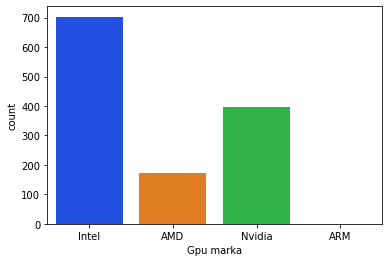

In [66]:
df['Gpu marka'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(df['Gpu marka'], palette='bright')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu marka', ylabel='count'>

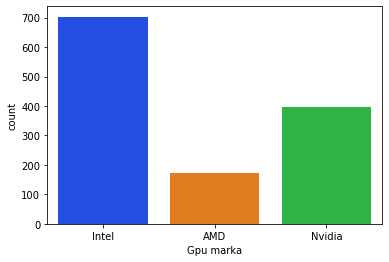

In [67]:
# 'ARM' kaldırma

df = df[df['Gpu marka']!='ARM']
sns.countplot(df['Gpu marka'],palette='bright')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Grafik Kartına Göre Ortalama Fiyatlar')]

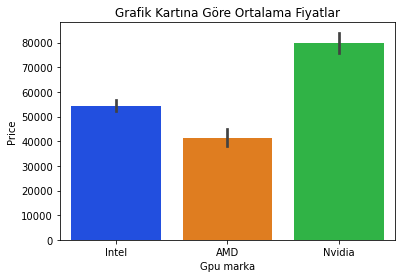

In [68]:
sns.barplot(df['Gpu marka'],df['Price'], estimator=np.mean, palette='bright').set(title='Grafik Kartına Göre Ortalama Fiyatlar')

In [69]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,HDD,SSD,Hybrid,Flash_Storage,Gpu marka
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


### OpSys

In [70]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


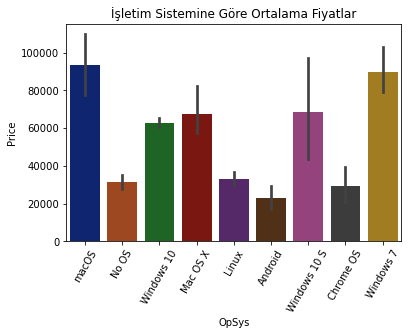

In [71]:
sns.barplot(df['OpSys'], df['Price'], palette='dark').set(title='İşletim Sistemine Göre Ortalama Fiyatlar')
plt.xticks(rotation = '60')
plt.show()

In [72]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [73]:
# {Windows 10 S, Windows 10, Windows 7}-->Windows
# {macOS,mac OS X}--> mac
# else return Diger

def deger_uygulama(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Diger'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:deger_uygulama(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,HDD,SSD,Hybrid,Flash_Storage,Gpu marka
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,8,Diger,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

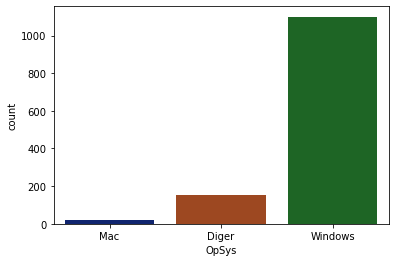

In [74]:
sns.countplot(df['OpSys'], palette='dark')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Diger'), Text(2, 0, 'Windows')])

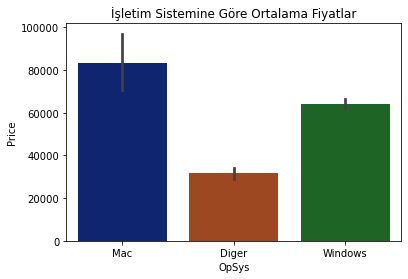

In [75]:
plt.title('İşletim Sistemine Göre Ortalama Fiyatlar')
sns.barplot(x = df['OpSys'], y = df['Price'], palette='dark')
plt.xticks(rotation = '0')

### Weight

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Weight Değişkeni Dağılımı')]

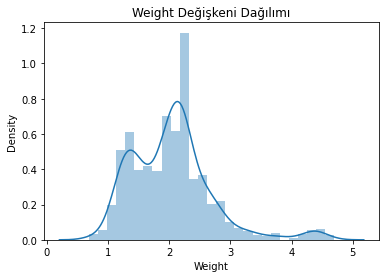

In [76]:
sns.distplot(df['Weight']).set(title='Weight Değişkeni Dağılımı')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Weight Değişkeni Dağılım Grafiği')]

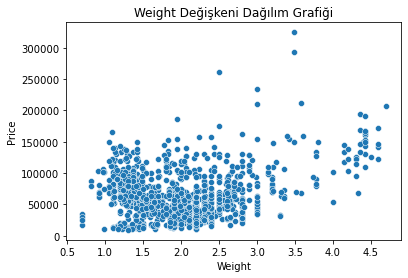

In [77]:
sns.scatterplot(df['Weight'], df['Price']).set(title='Weight Değişkeni Dağılım Grafiği')

### Price

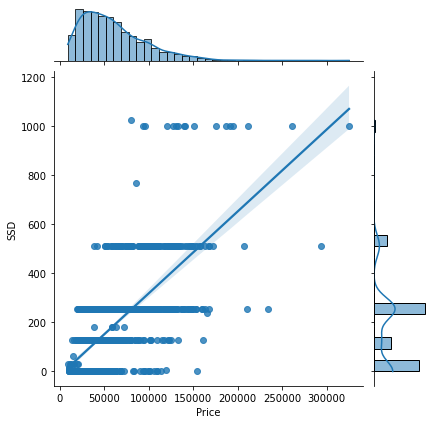

In [78]:
sns.jointplot(x = "Price", y = "SSD", data = df, kind = "reg")

In [79]:
df.corr()['Price']

Ram              0.739996
Weight           0.211667
Price            1.000000
TouchScreen      0.190382
IPS              0.251514
PPI              0.471481
HDD             -0.098481
SSD              0.669808
Hybrid           0.022490
Flash_Storage   -0.036712
Name: Price, dtype: float64

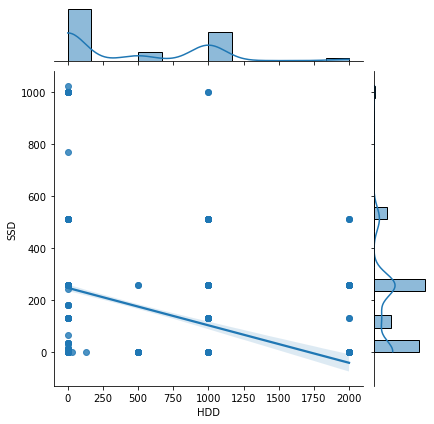

In [80]:
sns.jointplot(x = "HDD", y = "SSD", data = df, kind = "reg")

***`Hybrid` ve `Flash_Storage` değişkenlerinin `Price` değişkeni ile çok düşük korelasyona sahip olması ve bu özelliklere sahip laptop sayısının az olması bu iki değişkenin önemsiz kılıyor. Bundan dolayı bu iki değişkeni modelimizden çıkartıyoruz. `HDD` değişkenin `Price` değişkeni ile düşük korelasyona sahip olmasına rağmen modelde tutuyoruz çünkü `HDD` değişkeni, `SSD` değişkeni ile önemli denilebilecek derecede negatif korelasyona sahip.***

In [81]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_isim,HDD,SSD,Gpu marka
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Diger,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


##

<AxesSubplot:>

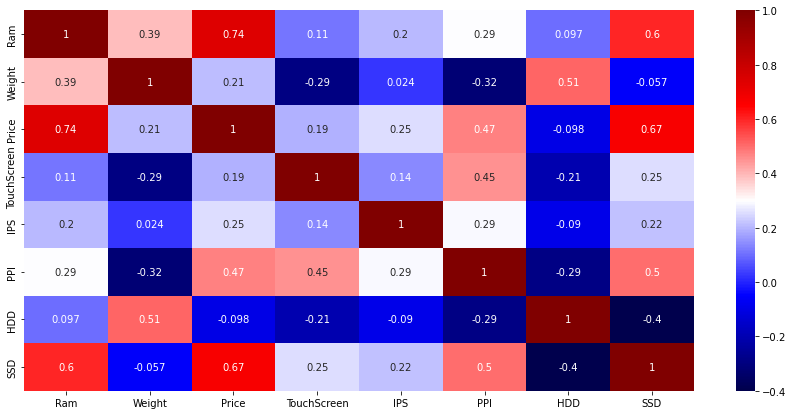

In [82]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='seismic')

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ram,1273.0,8.447761,5.098771,2.000000,4.000000,8.000000,8.000000,64.000000
Weight,1273.0,2.041099,0.669241,0.690000,1.500000,2.040000,2.310000,4.700000
Price,1273.0,60523.131394,37341.103385,9270.720000,32447.520000,52693.920000,79813.440000,324954.720000
TouchScreen,1273.0,0.146897,0.354142,0.000000,0.000000,0.000000,0.000000,1.000000
IPS,1273.0,0.279654,0.449006,0.000000,0.000000,0.000000,1.000000,1.000000
PPI,1273.0,146.950812,42.926775,90.583402,127.335675,141.211998,157.350512,352.465147
HDD,1273.0,413.715632,518.054486,0.000000,0.000000,0.000000,1000.000000,2000.000000
SSD,1273.0,186.252946,186.531571,0.000000,0.000000,256.000000,256.000000,1024.000000


# Model Uygulama

##

In [84]:
# One hot encoding uygulama

one_hot_encoder = OneHotEncoder()
data = one_hot_encoder.fit_transform(df[["Company", "TypeName", "OpSys", "CPU_isim", "Gpu marka"]])
one_hot_encode_data = pd.DataFrame(data.toarray(), columns=one_hot_encoder.get_feature_names_out(), dtype=int)
one_hot_encode_data.head()

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,OpSys_Mac,OpSys_Windows,CPU_isim_AMD Islemci,CPU_isim_Diger Intel Islemciler,CPU_isim_Intel Core i3,CPU_isim_Intel Core i5,CPU_isim_Intel Core i7,Gpu marka_AMD,Gpu marka_Intel,Gpu marka_Nvidia
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [85]:
# data frameleri birleştirme

df_model = df.join(one_hot_encode_data)

In [86]:
df_model = df_model.drop(labels = ["Company","TypeName", "OpSys", "CPU_isim", "Gpu marka"], axis = 1)

In [87]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1273 non-null   int32  
 1   Weight                           1273 non-null   float32
 2   Price                            1273 non-null   float64
 3   TouchScreen                      1273 non-null   int64  
 4   IPS                              1273 non-null   int64  
 5   PPI                              1273 non-null   float64
 6   HDD                              1273 non-null   int64  
 7   SSD                              1273 non-null   int64  
 8   Company_Acer                     1272 non-null   float64
 9   Company_Apple                    1272 non-null   float64
 10  Company_Asus                     1272 non-null   float64
 11  Company_Chuwi                    1272 non-null   float64
 12  Company_Dell        

In [88]:
df_model.isnull().sum()

Ram                                0
Weight                             0
Price                              0
TouchScreen                        0
IPS                                0
PPI                                0
HDD                                0
SSD                                0
Company_Acer                       1
Company_Apple                      1
Company_Asus                       1
Company_Chuwi                      1
Company_Dell                       1
Company_Fujitsu                    1
Company_Google                     1
Company_HP                         1
Company_Huawei                     1
Company_LG                         1
Company_Lenovo                     1
Company_MSI                        1
Company_Mediacom                   1
Company_Microsoft                  1
Company_Razer                      1
Company_Samsung                    1
Company_Toshiba                    1
Company_Vero                       1
Company_Xiaomi                     1
T

In [89]:
df_model["Company_Acer"].fillna(df_model["Company_Acer"].value_counts().index[0], inplace=True)
df_model["Company_Apple"].fillna(df_model["Company_Apple"].value_counts().index[0], inplace=True)
df_model["Company_Asus"].fillna(df_model["Company_Asus"].value_counts().index[0], inplace=True)
df_model["Company_Chuwi"].fillna(df_model["Company_Chuwi"].value_counts().index[0], inplace=True)
df_model["Company_Dell"].fillna(df_model["Company_Dell"].value_counts().index[0], inplace=True)
df_model["Company_Fujitsu"].fillna(df_model["Company_Fujitsu"].value_counts().index[0], inplace=True)
df_model["Company_Google"].fillna(df_model["Company_Google"].value_counts().index[0], inplace=True)
df_model["Company_HP"].fillna(df_model["Company_HP"].value_counts().index[0], inplace=True)
df_model["Company_Huawei"].fillna(df_model["Company_Huawei"].value_counts().index[0], inplace=True)
df_model["Company_LG"].fillna(df_model["Company_LG"].value_counts().index[0], inplace=True)
df_model["Company_Lenovo"].fillna(df_model["Company_Lenovo"].value_counts().index[0], inplace=True)
df_model["Company_MSI"].fillna(df_model["Company_MSI"].value_counts().index[0], inplace=True)
df_model["Company_Mediacom"].fillna(df_model["Company_Mediacom"].value_counts().index[0], inplace=True)
df_model["Company_Microsoft"].fillna(df_model["Company_Microsoft"].value_counts().index[0], inplace=True)
df_model["Company_Razer"].fillna(df_model["Company_Razer"].value_counts().index[0], inplace=True)
df_model["Company_Samsung"].fillna(df_model["Company_Samsung"].value_counts().index[0], inplace=True)
df_model["Company_Toshiba"].fillna(df_model["Company_Toshiba"].value_counts().index[0], inplace=True)
df_model["Company_Vero"].fillna(df_model["Company_Vero"].value_counts().index[0], inplace=True)
df_model["Company_Xiaomi"].fillna(df_model["Company_Xiaomi"].value_counts().index[0], inplace=True)
df_model["TypeName_2 in 1 Convertible"].fillna(df_model["TypeName_2 in 1 Convertible"].value_counts().index[0], inplace=True)
df_model["TypeName_Gaming"].fillna(df_model["TypeName_Gaming"].value_counts().index[0], inplace=True)
df_model["TypeName_Netbook"].fillna(df_model["TypeName_Netbook"].value_counts().index[0], inplace=True)
df_model["TypeName_Notebook"].fillna(df_model["TypeName_Notebook"].value_counts().index[0], inplace=True)
df_model["TypeName_Ultrabook"].fillna(df_model["TypeName_Ultrabook"].value_counts().index[0], inplace=True)
df_model["TypeName_Workstation"].fillna(df_model["TypeName_Workstation"].value_counts().index[0], inplace=True)
df_model["OpSys_Diger"].fillna(df_model["OpSys_Diger"].value_counts().index[0], inplace=True)
df_model["OpSys_Mac"].fillna(df_model["OpSys_Mac"].value_counts().index[0], inplace=True)
df_model["OpSys_Windows"].fillna(df_model["OpSys_Windows"].value_counts().index[0], inplace=True)
df_model["CPU_isim_AMD Islemci"].fillna(df_model["CPU_isim_AMD Islemci"].value_counts().index[0], inplace=True)
df_model["CPU_isim_Diger Intel Islemciler"].fillna(df_model["CPU_isim_Diger Intel Islemciler"].value_counts().index[0], inplace=True)
df_model["CPU_isim_Intel Core i3"].fillna(df_model["CPU_isim_Intel Core i3"].value_counts().index[0], inplace=True)
df_model["CPU_isim_Intel Core i5"].fillna(df_model["CPU_isim_Intel Core i5"].value_counts().index[0], inplace=True)
df_model["CPU_isim_Intel Core i7"].fillna(df_model["CPU_isim_Intel Core i7"].value_counts().index[0], inplace=True)
df_model["Gpu marka_AMD"].fillna(df_model["Gpu marka_AMD"].value_counts().index[0], inplace=True)
df_model["Gpu marka_Intel"].fillna(df_model["Gpu marka_Intel"].value_counts().index[0], inplace=True)
df_model["Gpu marka_Nvidia"].fillna(df_model["Gpu marka_Nvidia"].value_counts().index[0], inplace=True)

In [90]:
df_model.isnull().sum()

Ram                                0
Weight                             0
Price                              0
TouchScreen                        0
IPS                                0
PPI                                0
HDD                                0
SSD                                0
Company_Acer                       0
Company_Apple                      0
Company_Asus                       0
Company_Chuwi                      0
Company_Dell                       0
Company_Fujitsu                    0
Company_Google                     0
Company_HP                         0
Company_Huawei                     0
Company_LG                         0
Company_Lenovo                     0
Company_MSI                        0
Company_Mediacom                   0
Company_Microsoft                  0
Company_Razer                      0
Company_Samsung                    0
Company_Toshiba                    0
Company_Vero                       0
Company_Xiaomi                     0
T

## Lineer Regresyon

### Başlangıç Modeli

In [91]:
# Değişkenlerin Seçimi

x = df_model.drop("Price", axis=1)
y = df_model["Price"]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [93]:
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)

In [94]:
print("Model denkleminin sabiti:", lr_model.intercept_)

Model denkleminin sabiti: -10241.402865776152


In [95]:
print("Model denkleminin katsayıları:\n\n", lr_model.coef_)

Model denkleminin katsayıları:

 [ 2.62223538e+03  1.03318601e+04 -4.20078448e+03  5.26942021e+02
  1.62695364e+02  1.80327317e+00  5.00565507e+01 -8.38797094e+03
  2.79008008e+03 -6.29889713e+03 -2.38987725e+04 -2.86189226e+03
  3.63797881e-12  1.03208228e+04  1.11820885e+03 -7.67569631e+03
  1.40552625e+04 -4.22320011e+02  3.07966802e+03 -1.70197674e+04
  1.88074301e+04  1.82673162e+04  1.26390889e+04  3.10854873e+03
 -1.59210524e+04 -1.70005719e+03 -6.43255786e+03 -7.28638608e+03
 -1.22714025e+04 -1.57468694e+04 -9.88278256e+02  4.27254941e+04
 -5.68056986e+03  2.79008008e+03  2.89048978e+03 -3.42497177e+03
 -7.47714351e+02 -2.62465070e+03  3.14548430e+03  3.65185252e+03
 -4.12617284e+03  4.42297207e+03 -2.96799233e+02]


In [96]:
y_tahmin = lr_model.predict(x_train)

In [97]:
# r_kare değeri

print("R^2 değeri:", metrics.r2_score(y_train, y_tahmin)) 

R^2 değeri: 0.7577780475571997


In [98]:
hatalar = y_train.values-y_tahmin

### Varsayımların Kontrolü

**Normallik Varsayımı**

***Bağımlı değişken normal dağılıma sahip olmalı***

****`Price değişkeninin dağılımına baktığımız zaman normal dağılmadığını, sağa çarpık bir dağılıma sahip olduğunu görüyoruz. O yüzden bu değişken üzerinde logaritmik dönüşüm uygulanmış ve normal dağılıma sahip olması sağlanmıştır`****

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Price Değişkeni Dağılımı')]

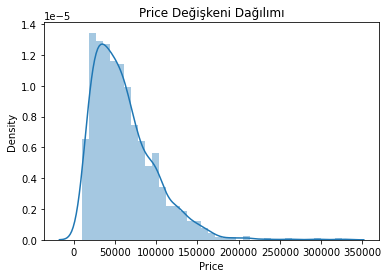

In [99]:
# Sağa Çarpık Dağılım 

sns.distplot(df_model['Price']).set(title='Price Değişkeni Dağılımı')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Logaritmik Dönüşüm Uygulanmış Price Değişkeni Dağılımı')]

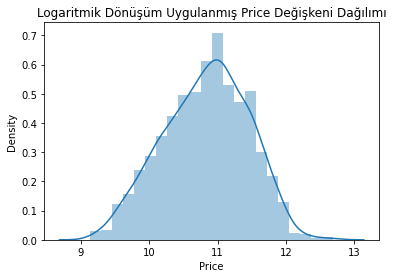

In [100]:
# Logaritmik dönüşüm uygulanmış price değişkeninin normal dağılıma benzediğini görebiliyoruz

sns.distplot(np.log(df_model['Price'])).set(title='Logaritmik Dönüşüm Uygulanmış Price Değişkeni Dağılımı')

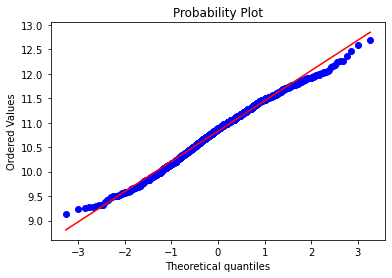

In [101]:
stats.probplot(np.log(df_model['Price']), dist="norm", plot=pylab)
pylab.show()

**Lineerlik Varsayımı**

***Bağımlı değişken ile ağımsız Değişkenler arasında lineer ilişki olmalı.***

***`Bu varsayımın 'Company_Xiaomi' değişkeni dışında sağlandığını kabul edebiliriz. Bu değişken fiyat ile çok çok düşük korelasyona sahip olduğu için modelimizden kaldırabiliriz`***

In [102]:
df_model.corr()['Price']

Ram                                0.739996
Weight                             0.211667
Price                              1.000000
TouchScreen                        0.190382
IPS                                0.251514
PPI                                0.471481
HDD                               -0.098481
SSD                                0.669808
Company_Acer                      -0.193502
Company_Apple                      0.089126
Company_Asus                      -0.030799
Company_Chuwi                     -0.057002
Company_Dell                       0.066501
Company_Fujitsu                   -0.028232
Company_Google                     0.037582
Company_HP                        -0.036721
Company_Huawei                     0.016310
Company_LG                         0.066813
Company_Lenovo                    -0.030788
Company_MSI                        0.156229
Company_Mediacom                  -0.089258
Company_Microsoft                  0.046792
Company_Razer                   

In [103]:
df_model = df_model.drop(labels = ["Company_Xiaomi"], axis = 1)

In [104]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1273 non-null   int32  
 1   Weight                           1273 non-null   float32
 2   Price                            1273 non-null   float64
 3   TouchScreen                      1273 non-null   int64  
 4   IPS                              1273 non-null   int64  
 5   PPI                              1273 non-null   float64
 6   HDD                              1273 non-null   int64  
 7   SSD                              1273 non-null   int64  
 8   Company_Acer                     1273 non-null   float64
 9   Company_Apple                    1273 non-null   float64
 10  Company_Asus                     1273 non-null   float64
 11  Company_Chuwi                    1273 non-null   float64
 12  Company_Dell        

**Çoklu Doğrusallık Varsayımı**

`Regresyon analizlerinde sürekli bağımsız değişkenler arasındaki çoklu bağlantıyı (multicollinearity) tespit etmek için kullandığımız istatistiksel bir ölçüdür. Sürekli bir bağımsız değişkenin VIF değeri, o değişkenin veri setinde bulunan diğer sürekli bağımsız değişkenler tarafından ne kadar iyi
açıklandığını gösterir. Dolayısıyla VIF değeri yüksek çıkan bir değişkeni analizde kullanmanın gerekliliği yoktur. VIF değerinin alabileceği en düşük değer 1’dir. Üst sınırı yoktur. Değer 1’e ne kadar yakınsa korelasyon o kadar azdır. Genellikle 5’ten veya 10’dan büyük VIF değerine sahip değişkenler analizden çıkarılır `Craney, T. A., & Surles, J. G. (2002). Model-dependent variance inflation factor cutoff values. Quality engineering, 14(3), 391-403`. Çünkü diğer değişkenler tarafından açıklanabilirliği yüksek olan bir değişkeni analizde tutmanın yararı yoktur.`

`Aşağıdaki tabloda görüldüğü üzere bütün sürekli bağımsız değişkenlerin VIF değerleri 10'dan düşük olduğu için bu varsayım sağlanıyor.`

In [105]:
kontrol=df_model[["Ram", "Weight", "IPS", "HDD", "SSD"]]

def vif_hesap(df):
    vif = pd.DataFrame()
    vif["variables"]= kontrol.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
vif_hesap(kontrol)

,variables,VIF
0,Ram,8.673823
1,Weight,6.278473
2,IPS,1.460579
3,HDD,2.890476
4,SSD,4.520213


**Sabit Varyans Varsayımı**

`Hatalar yani artıklar, tahmin değerlerinin her noktasında sabit varyansa sahip olmalıdır, yani tahmin değerleri ile elde edilen hatalar arasında bir bağlantı olmamalı`

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


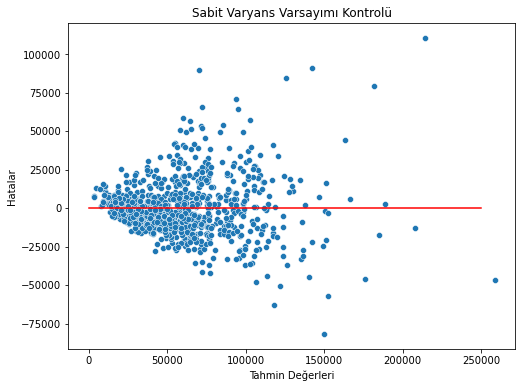

In [106]:
plt.figure(figsize=(8,6))
p = sns.scatterplot(y_tahmin, hatalar)
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Hatalar')
p = sns.lineplot([0,250000],[0,0],color='red')
p = plt.title('Sabit Varyans Varsayımı Kontrolü')

****`Goldfeld – Quandt testi`****

`İstatistikte , Goldfeld -Quandt testi , regresyon analizlerinde sabit varyans olup olmadığını kontrol eder.`

**Hipotez:**

<d><i>H</i><sub>0</sub>:  hatalar sabit varyansa sahiptir   
<d><i>H</i><sub>1</sub>:  hatalar sahip varyansa sahip değildir

In [107]:
test= sms.het_goldfeldquandt(hatalar, x_train)
 
alpha = 0.05
 
print(test, "\n") 
 
if test[1] > alpha:
    print('H0 hipotezi red edilemez. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt vardır.')
 
else:
    print('H0 hipotezi red edilir. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt yoktur.')

(1.201199318578541, 0.03522598768534458, 'increasing') 

H0 hipotezi red edilir. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt yoktur.


`%95 güven aralığında gerçekleştirdiğimiz yukarıdaki istatistiksel testin sonucuna göre, p değeri 0.05'ten küçük olduğu için sıfır hipotezini reddetmek durumundayız. Bu durumda hata değerlerinin sabit varyansa sahip olduğunu söyleyemiyoruz ve dolayısıyla varsayımımız sağlanmıyor. Varsayımın sağlanmadığını görsel olarakta görebilmekteyiz. Yukarıdaki grafikte tahmin değerleri arttıkça hatalarda da bir artış olduğu net bir şekilde görülebilmektedir.`

***Çözüm:***

`Fiyat değişkenine logaritmik dönüşüm uygulayıp başlangıç modelini tekrar fit etmek.`

In [108]:
y = np.log(df["Price"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

lr_model_vrsym = lr.fit(x_train, y_train)

y_tahmin = lr_model_vrsym.predict(x_train)

hatalar = y_train.values-y_tahmin

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


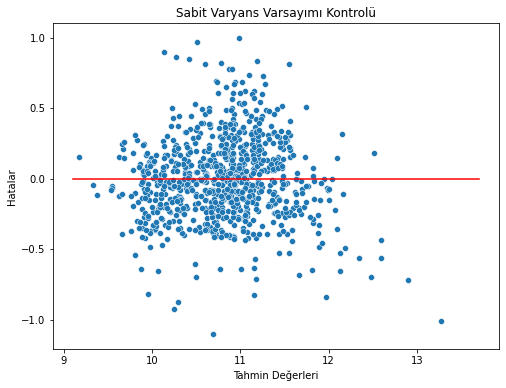

In [109]:
plt.figure(figsize=(8,6))
p = sns.scatterplot(y_tahmin, hatalar)
plt.xlabel('Tahmin Değerleri')
plt.ylabel('Hatalar')
p = sns.lineplot([9.1,13.7],[0,0],color='red')
p = plt.title('Sabit Varyans Varsayımı Kontrolü')

**Hipotez:**

<d><i>H</i><sub>0</sub>:  hatalar sabit varyansa sahiptir   
<d><i>H</i><sub>1</sub>:  hatalar sahip varyansa sahip değildir

In [110]:
isim = ['F istatistiği', 'p-değeri']
test = sms.het_goldfeldquandt(hatalar, x_train)
 
alpha = 0.05
 
print(test, "\n") 
 
if test[1] > alpha:
    print('H0 hipotezi red edilemez. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt vardır.')
 
else:
    print('H0 hipotezi red edilir. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt yoktur.')

(0.9608724521529519, 0.6532299492415992, 'increasing') 

H0 hipotezi red edilemez. Hataların sabit varyansa sahip olduğunu söylemek için yeterli kanıt vardır.


`%95 güven aralığında gerçekleştirdiğimiz yukarıdaki istatistiksel testin sonucuna göre, p değeri 0.05'ten büyük olduğu için sıfır hipotezini reddedemiyoruz. Dolayısıyla varsayımımız sağlanıyor. Varsayımın sağlandığını görsel olarakta görebilmekteyiz. Yukarıdaki grafikte tahmin değerleri ile hatalar arasında bir ilişki görülememektedir.`

***Bütün varsayımlar sağlandığına göre final modelimizi uygulayabiliriz.***

### Final Modeli

In [111]:
# Değişkenlerin Seçimi

x = df_model.drop("Price", axis=1)
y = np.log(df_model["Price"])

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

In [113]:
lr = LinearRegression()
lr_model_final = lr.fit(x_train, y_train)

In [114]:
y_tahmin = lr_model_final.predict(x_test)

In [115]:
print("R-kare değeri:", metrics.r2_score(y_test, y_tahmin)) 

# MAE: ortalama mutlak hata

print('MAE:',np.exp(metrics.mean_absolute_error(y_test,y_tahmin)))

# MAE: ortalama kare hata

print('MSE:',np.exp(metrics.mean_squared_error(y_test,y_tahmin)))

R-kare değeri: 0.788766726469708
MAE: 1.244238253779813
MSE: 1.0868068676919296


In [116]:
print("Lineer regresyon model denklemi sabiti:", lr_model_final.intercept_)
print("\nLineer regresyon model denklemi katsayıları:\n\n", lr_model_final.coef_)

Lineer regresyon model denklemi sabiti: 10.03276594862867

Lineer regresyon model denklemi katsayıları:

 [ 3.22321585e-02  9.92547074e-02 -7.30777383e-02  6.13670361e-02
  2.34334104e-03  3.70447228e-05  7.30993783e-04 -2.97773813e-01
  3.27175682e-02 -2.71545963e-01 -6.77297229e-01 -1.50757357e-01
 -3.69608568e-01  1.11505873e-01 -1.20273054e-01 -2.61055665e-01
  1.17124726e-01 -1.89796787e-01 -1.33356445e-01 -5.73979602e-01
  1.19331325e-01 -1.23741026e-01  1.93513640e-02 -1.66291863e-02
 -9.53534766e-01 -4.91705137e-02 -1.02774113e-01 -4.35023767e-02
 -2.36311669e-01  9.43580716e-04  4.30815092e-01 -1.11912378e-01
  3.27175682e-02  7.91948101e-02 -2.22160080e-01 -3.41314193e-01
 -1.36817295e-01  1.54392647e-01  1.57975078e-01 -7.76499563e-02
  5.52746860e-02  2.23752702e-02]


#### Model Doğrulama

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

lr = LinearRegression()
lr_model_final_dogrulanmıs = lr.fit(x_train, y_train)

In [118]:
#10 tane birbirinden farklı r2 değeri

cross_val_score(lr_model_final_dogrulanmıs, x_train, y_train, cv=10, scoring="r2")

array([0.74570394, 0.73271227, 0.69664506, 0.77634386, 0.67848651,
       0.78784695, 0.82303412, 0.83672326, 0.71725987, 0.73956223])

In [119]:
print("Doğrulanmış R-kare değeri:", cross_val_score(lr_model_final_dogrulanmıs, x_train, y_train, cv=10, scoring="r2").mean())

print("\nDoğrulanmış ortalama mutlak hata:", np.exp(-cross_val_score(lr_model_final_dogrulanmıs, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_absolute_error").mean()))

print("\nDoğrulanmış ortalama kare hata:", np.exp(-cross_val_score(lr_model_final_dogrulanmıs, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_squared_error")).mean())

Doğrulanmış R-kare değeri: 0.7534318068541204

Doğrulanmış ortalama mutlak hata: 1.26308262441274

Doğrulanmış ortalama kare hata: 1.0951330212568544


## Karar Ağacı

###

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

dt_model= DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [121]:
y_tahmin = dt_model.predict(x_test)

In [122]:
print("R-kare değeri:", metrics.r2_score(y_test, y_tahmin)) 

# MAE: ortalama mutlak hata

print('MAE:',np.exp(metrics.mean_absolute_error(y_test,y_tahmin)))

print('MSE:',np.exp(metrics.mean_squared_error(y_test,y_tahmin)))

R-kare değeri: 0.723053025488101
MAE: 1.2842746250973907
MSE: 1.1153192849310316


In [123]:
print(skompile(dt_model.predict).to('python/code'))

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


((((((9.317895278196945 if x[1] <= 1.3349999785423279 else 
    9.409283029786373) if x[7] <= 0.5 else 9.134616325446663) if x[0] <= 
    3.0 else ((((10.841452101115571 if x[1] <= 1.2850000262260437 else ((
    10.510802297245792 if x[11] <= 0.5 else 10.34717287346399) if x[4] <= 
    114.88086700439453 else 10.71962021254348 if x[6] <= 64.0 else 
    10.510802297245792 if x[3] <= 0.5 else 10.717261720884188) if x[4] <= 
    149.28125762939453 else (((10.576614498925235 if x[14] <= 0.5 else 
    10.55342238395318) if x[41] <= 0.5 else 10.525211768465944) if x[1] <= 
    1.6700000166893005 else 10.430759589572256 if x[5] <= 500.0 else 
    10.450993742936223) if x[17] <= 0.5 else 10.283659467741664 if x[1] <= 
    1.600000023841858 else 10.370822624347584 if x[2] <= 0.5 else 
    10.433899309576924 if x[36] <= 0.5 else 10.419692282932575) if x[39] <=
    0.5 else 10.126163794678414) if x[26] <= 0.5 else 10.978617394068182 if
    x[5] <= 250.0 else 10.749784912589748) if x[29] <= 0.5 el

[Text(0.4606272709234698, 0.98, 'Ram <= 7.0\nsquared_error = 0.377\nsamples = 852\nvalue = 10.81'),
 Text(0.18057999212403314, 0.94, 'CPU_isim_Intel Core i5 <= 0.5\nsquared_error = 0.196\nsamples = 285\nvalue = 10.228'),
 Text(0.11722579532748899, 0.9, 'CPU_isim_Diger Intel Islemciler <= 0.5\nsquared_error = 0.14\nsamples = 203\nvalue = 10.07'),
 Text(0.04325160793956875, 0.86, 'Ram <= 3.0\nsquared_error = 0.115\nsamples = 125\nvalue = 10.207'),
 Text(0.013481980814104226, 0.82, 'Company_Acer <= 0.5\nsquared_error = 0.013\nsamples = 3\nvalue = 9.287'),
 Text(0.012099213551119177, 0.78, 'Weight <= 1.335\nsquared_error = 0.002\nsamples = 2\nvalue = 9.364'),
 Text(0.010716446288134129, 0.74, 'squared_error = 0.0\nsamples = 1\nvalue = 9.318'),
 Text(0.013481980814104226, 0.74, 'squared_error = 0.0\nsamples = 1\nvalue = 9.409'),
 Text(0.014864748077089275, 0.78, 'squared_error = -0.0\nsamples = 1\nvalue = 9.135'),
 Text(0.07302123506503327, 0.82, 'Weight <= 1.825\nsquared_error = 0.096\nsam

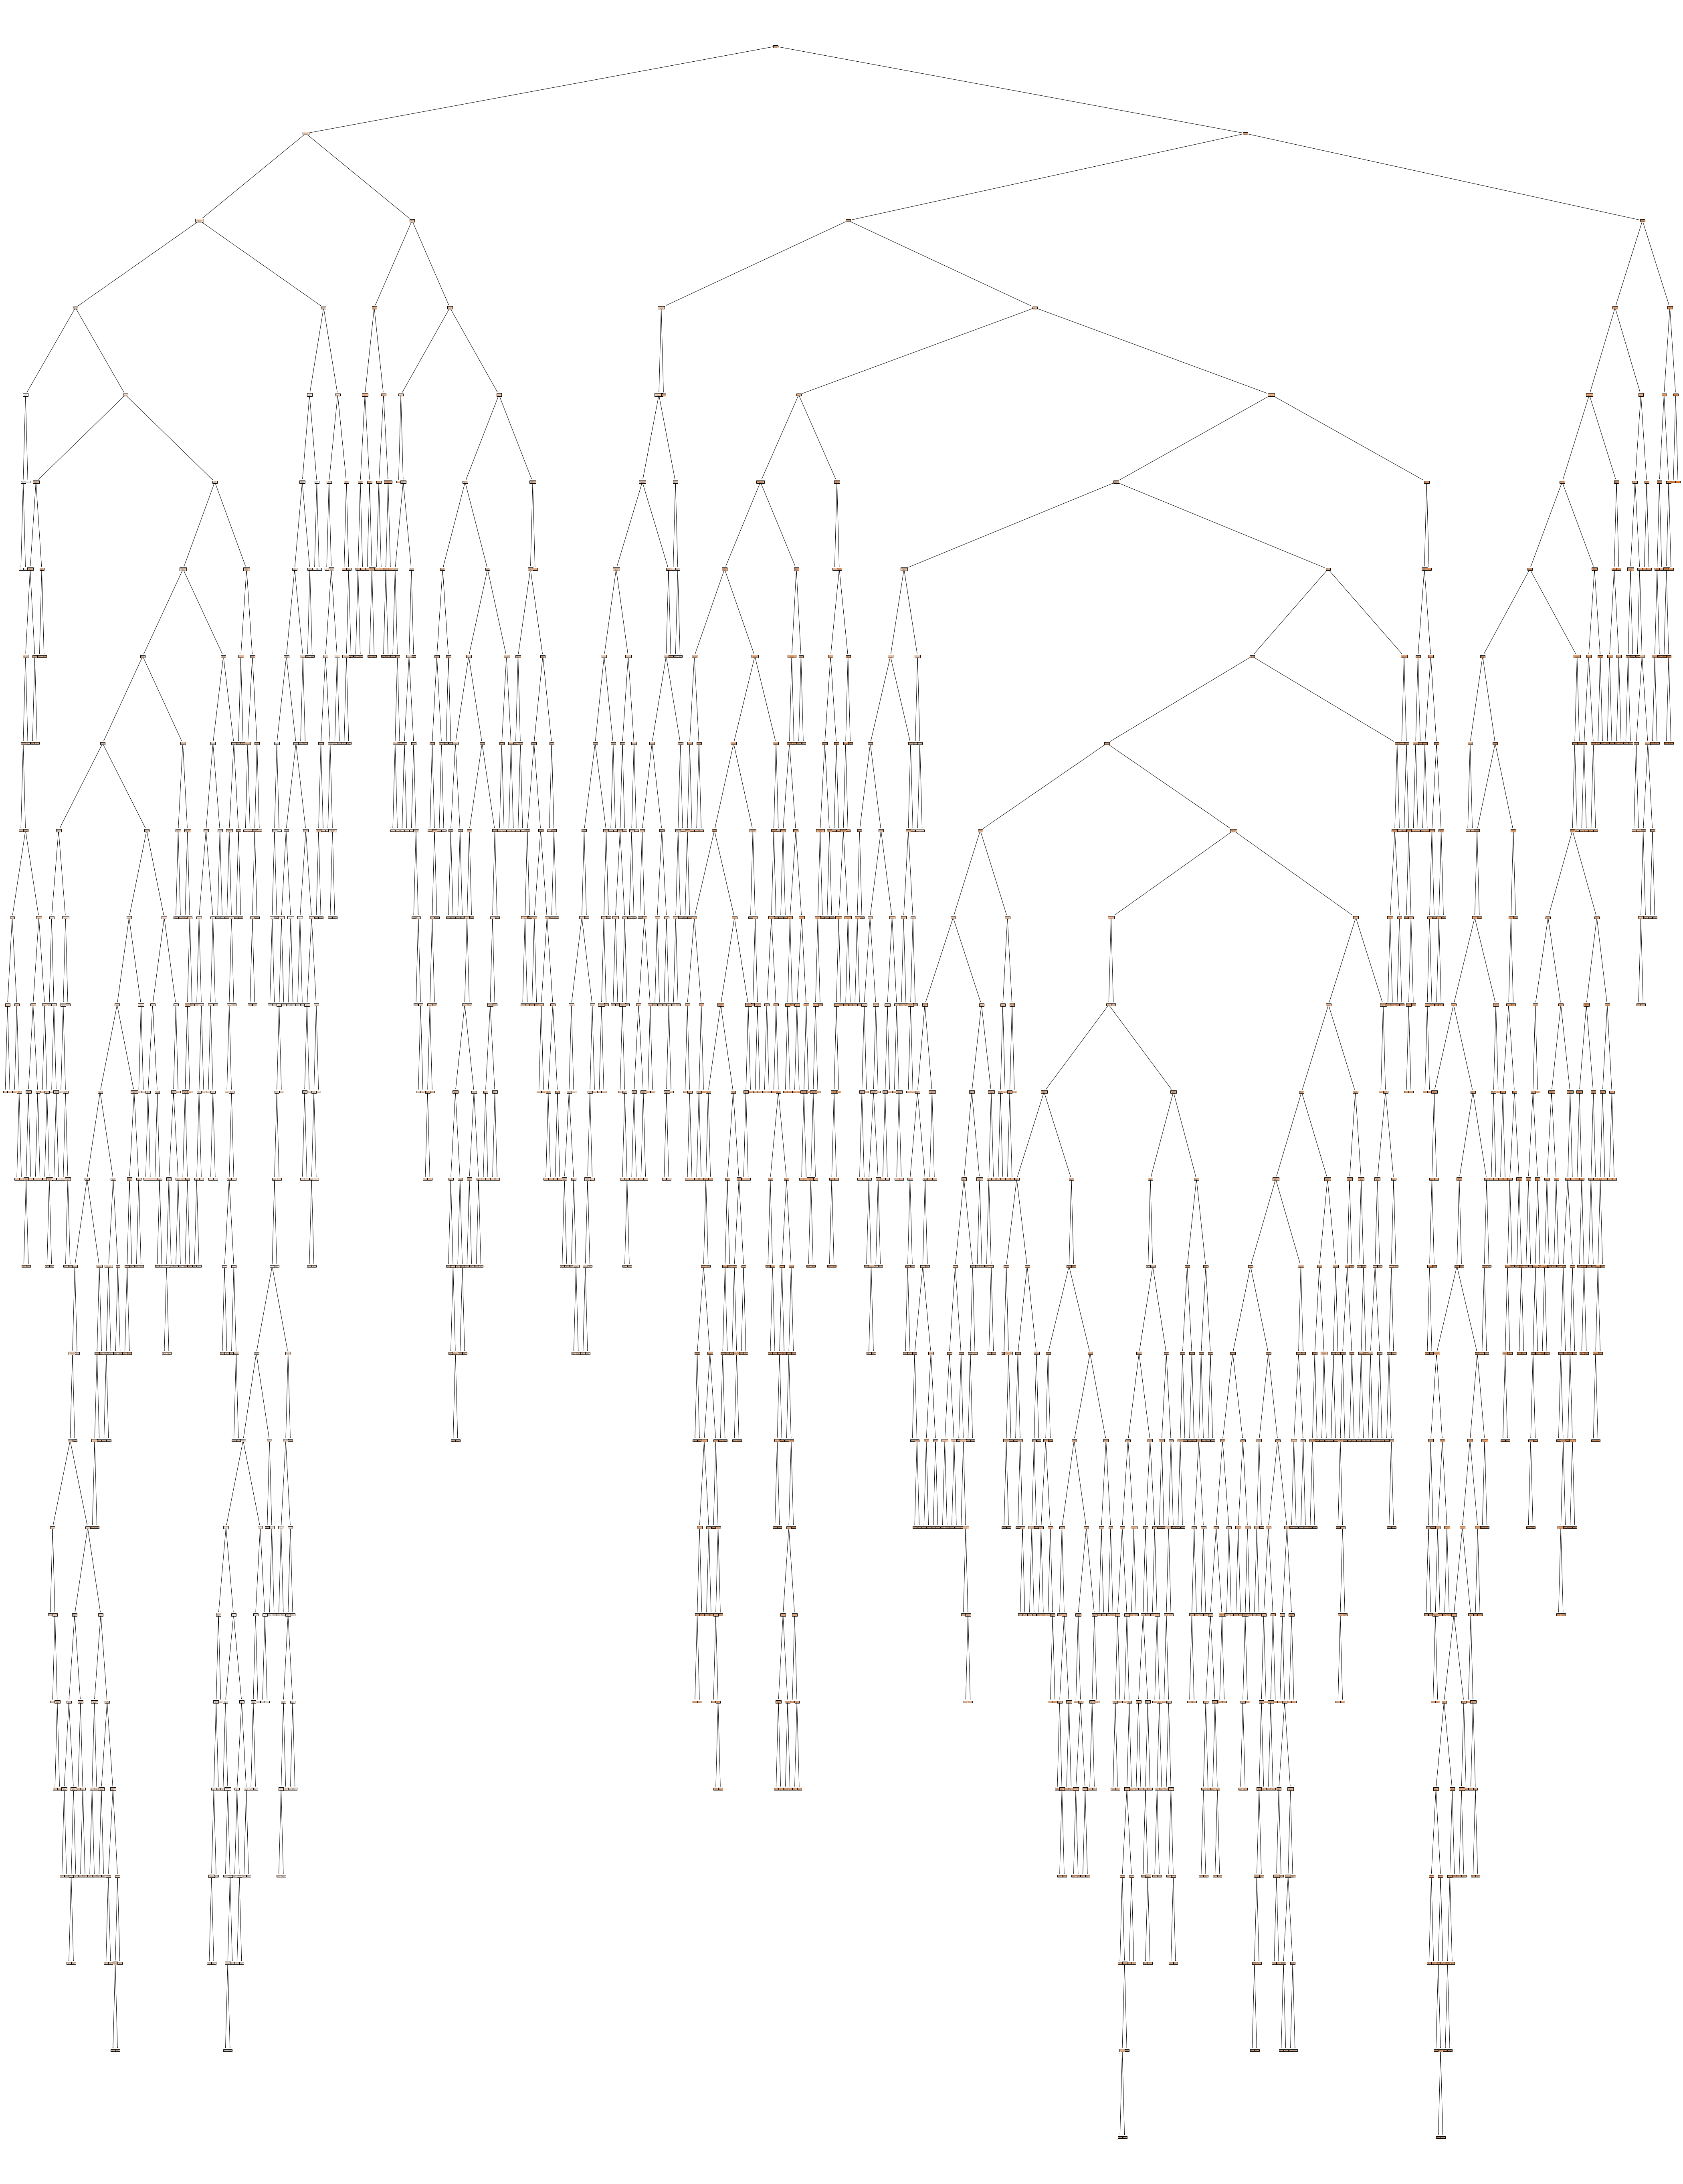

In [124]:
from sklearn import tree
plt.figure(figsize=(75,100))
tree.plot_tree(dt_model, 
                feature_names=x_train.columns,  
                class_names=str(df_model.Price),
                filled=True)

### Model Doğrulama

In [125]:
'''
max_depth= Karar Ağacının maksimum derinliğini ifade eder. Değer girilmezse limitsiz olur. Model overfit(aşırı uyum) olmuşsa düşürülmesi gerekir.

min_samples_split:Bir düğümün yeniden bölünmesi için minimum veri sayısının verildiği parametredir

min_samples_leaf: Çıktıların yer aldığı yapraklardaki veri sayısına göre o yaprağın gösterilip gösterilmeyeceğine karar verilen parametredir.
'''

dt_prmt = {"min_samples_split": range(2,100),
           "max_depth": range(2,15)}

In [126]:
dt_cv_model = GridSearchCV(dt_model, dt_prmt, cv = 10)

In [127]:
dt_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 15),
                         'min_samples_split': range(2, 100)})

In [128]:
print("En başarılı parametreler:", dt_cv_model.best_params_)

En başarılı parametreler: {'max_depth': 9, 'min_samples_split': 10}


In [129]:
dt_final_model = DecisionTreeRegressor(max_depth = dt_cv_model.best_params_['max_depth'], 
                                       min_samples_split = dt_cv_model.best_params_['min_samples_split'])

In [130]:
dt_final_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=10)

In [131]:
y_tahmin = dt_final_model.predict(x_test)

In [132]:
print("R-kare değeri:", metrics.r2_score(y_test, y_tahmin)) 

# MAE: ortalama mutlak hata

print('MAE:',np.exp(metrics.mean_absolute_error(y_test,y_tahmin)))

print('MSE:',np.exp(metrics.mean_squared_error(y_test,y_tahmin)))

R-kare değeri: 0.7965197401479588
MAE: 1.2478665953386077
MSE: 1.083491361718677


In [133]:
cross_val_score(dt_final_model, x_train, y_train, cv=10, scoring="r2")

array([0.75617476, 0.80604012, 0.75463116, 0.84689284, 0.79719289,
       0.8149351 , 0.82730182, 0.85748056, 0.76971337, 0.78649827])

In [134]:
print("Doğrulanmış R-kare değeri:", cross_val_score(dt_final_model, x_train, y_train, cv=10, scoring="r2").mean())

print("\nDoğrulanmış ortalama mutlak hata:", np.exp(-cross_val_score(dt_final_model, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_absolute_error")).mean())

print("\nDoğrulanmış ortalama kare hata:", np.exp(-cross_val_score(dt_final_model, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_squared_error")).mean())

Doğrulanmış R-kare değeri: 0.7996617035617786

Doğrulanmış ortalama mutlak hata: 1.2331175494290947

Doğrulanmış ortalama kare hata: 1.0744831535855526


## Rassal Orman

###

In [135]:
rf_model = RandomForestRegressor()

In [136]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [137]:
y_tahmin = rf_model.predict(x_test)

In [138]:
print("R-kare değeri:", metrics.r2_score(y_test,y_tahmin)) 

print('MAE:',np.exp(metrics.mean_absolute_error(y_test,y_tahmin)))

print('MSE:',np.exp(metrics.mean_squared_error(y_test,y_tahmin)))

R-kare değeri: 0.8511284801884929
MAE: 1.2070912192206913
MSE: 1.060423196399813


### Model Doğrulama

In [139]:
rf_prmt = {"n_estimators": [50, 100, 250, 500, 1000],
           "max_depth": range(2,15)}

In [140]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_prmt, 
                           cv = 10, 
                            n_jobs = -1)

In [141]:
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'n_estimators': [50, 100, 250, 500, 1000]})

In [142]:
print("En başarılı parametreler:", rf_cv_model.best_params_)

En başarılı parametreler: {'max_depth': 14, 'n_estimators': 500}


In [143]:
rf_final_model = RandomForestRegressor(n_estimators = rf_cv_model.best_params_['n_estimators'], 
                                       max_depth = rf_cv_model.best_params_['max_depth'])

In [144]:
rf_final_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=500)

In [145]:
y_tahmin = rf_final_model.predict(x_test)

In [146]:
print("R-kare değeri:", metrics.r2_score(y_test, y_tahmin)) 

# MAE: ortalama mutlak hata

print('MAE:',np.exp(metrics.mean_absolute_error(y_test,y_tahmin)))

print('MSE:',np.exp(metrics.mean_squared_error(y_test,y_tahmin)))

R-kare değeri: 0.8482828658381905
MAE: 1.2090673399706824
MSE: 1.0616130375322994


In [147]:
cross_val_score(rf_final_model, x_train, y_train, cv=10, scoring="r2")

array([0.8225916 , 0.82805883, 0.8301678 , 0.8948184 , 0.83368043,
       0.8662081 , 0.88341955, 0.88580655, 0.80160678, 0.82354106])

In [148]:
print("Doğrulanmış R-kare değeri:", cross_val_score(rf_final_model, x_train, y_train, cv=10, scoring="r2").mean())

print("\nDoğrulanmış ortalama mutlak hata:", np.exp(-cross_val_score(rf_final_model, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_absolute_error")).mean())

print("\nDoğrulanmış ortalama kare hata:", np.exp(-cross_val_score(rf_final_model, 
                x_train, 
                y_train, cv=10, 
                scoring="neg_mean_squared_error")).mean())

Doğrulanmış R-kare değeri: 0.8459328731339326

Doğrulanmış ortalama mutlak hata: 1.1974717489831868

Doğrulanmış ortalama kare hata: 1.0580074856020647


# Tahmin

In [149]:
tahminler_rf = []
tahminler_dt = []
tahminler_lr = []
tum_veri = np.array(x)
for i in range(len(tum_veri)):
    tahminler_rf.append(rf_final_model.predict([tum_veri[i]]))
    tahminler_dt.append(dt_final_model.predict([tum_veri[i]]))
    tahminler_lr.append(lr_model_final_dogrulanmıs.predict([tum_veri[i]]))

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: 

In [150]:
sonuc_lr = [np.exp(tahminler_lr[i][0]) for i in range(len(tahminler_lr))]
sonuc_rf = [np.exp(tahminler_rf[i][0]) for i in range(len(tahminler_rf))]
sonuc_dt = [np.exp(tahminler_dt[i][0]) for i in range(len(tahminler_dt))]

In [151]:
df_model['Tahmin LR'] = np.array(sonuc_lr)
df_model['Tahmin RF'] = np.array(sonuc_rf)
df_model['Tahmin DT'] = np.array(sonuc_dt)
df_model[['Price', "Tahmin LR", "Tahmin RF", "Tahmin DT"]]

,Price,Tahmin LR,Tahmin RF,Tahmin DT
0,71378.6832,88387.076847,70934.582346,72305.102245
1,47895.5232,59806.135559,56538.002236,72305.102245
2,30636.0000,45910.516427,44164.857513,54037.530900
3,135195.3360,137206.741680,121682.845363,132573.037262
4,96095.8080,97056.469963,84207.684355,72305.102245
...,...,...,...,...
1269,38378.6496,43802.848539,31820.719793,26492.882410
1270,33992.6400,51247.019547,36316.245201,35930.371488
1271,79866.7200,63196.495617,92581.909192,111992.146435
1272,12201.1200,30072.003220,13386.849383,10799.605426


In [152]:
satır = {'Lineer Regresyon': [cross_val_score(lr_model_final_dogrulanmıs, x_train, y_train, cv=10, scoring="r2").mean(), 
                              np.exp(-cross_val_score(lr_model_final_dogrulanmıs, x_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean()), 
                              np.exp(-cross_val_score(lr_model_final_dogrulanmıs, x_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()],
         
         'Karar Ağacı': [cross_val_score(dt_final_model, x_train, y_train, cv=10, scoring="r2").mean(), 
                              np.exp(-cross_val_score(dt_final_model, x_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean()), 
                              np.exp(-cross_val_score(dt_final_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()],
         
         'Rassal Orman': [cross_val_score(rf_final_model, x_train, y_train, cv=10, scoring="r2").mean(), 
                              np.exp(-cross_val_score(rf_final_model, x_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean()), 
                              np.exp(-cross_val_score(rf_final_model, x_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()]
        }

df_karsilastirma = pd.DataFrame(satır,
                  index=pd.Index(['R kare değeri', 'Ortalama mutlak hata', 'Ortalama kare hata']),
                  columns=pd.Index(['Lineer Regresyon', 'Karar Ağacı', 'Rassal Orman']))

In [153]:
df_karsilastirma

,Lineer Regresyon,Karar Ağacı,Rassal Orman
R kare değeri,0.753432,0.798762,0.845474
Ortalama mutlak hata,1.263083,1.233146,1.198015
Ortalama kare hata,1.095133,1.074731,1.058486


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


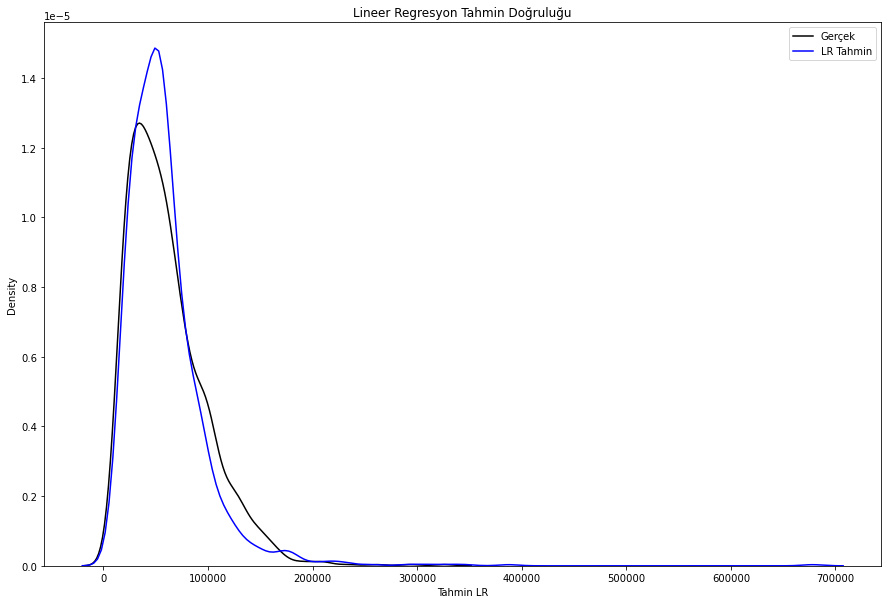

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


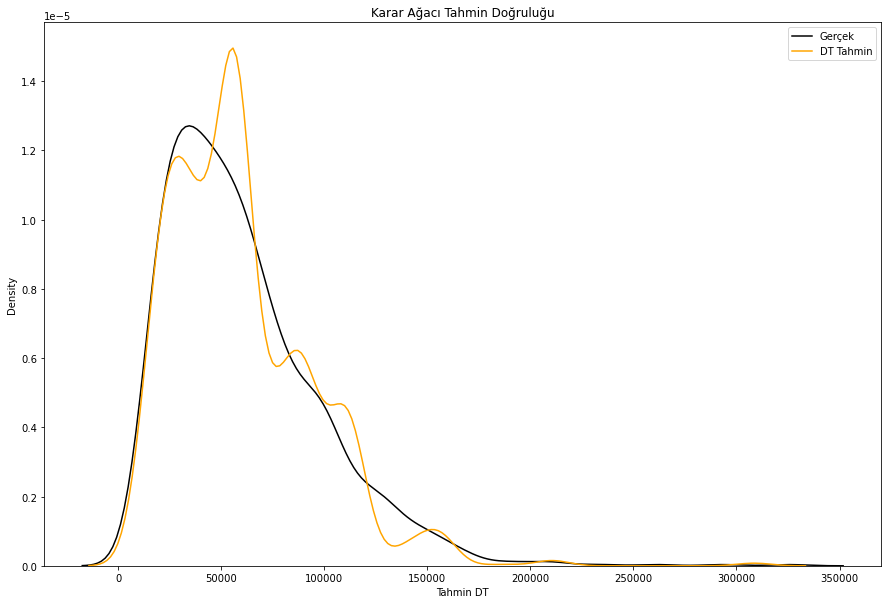

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


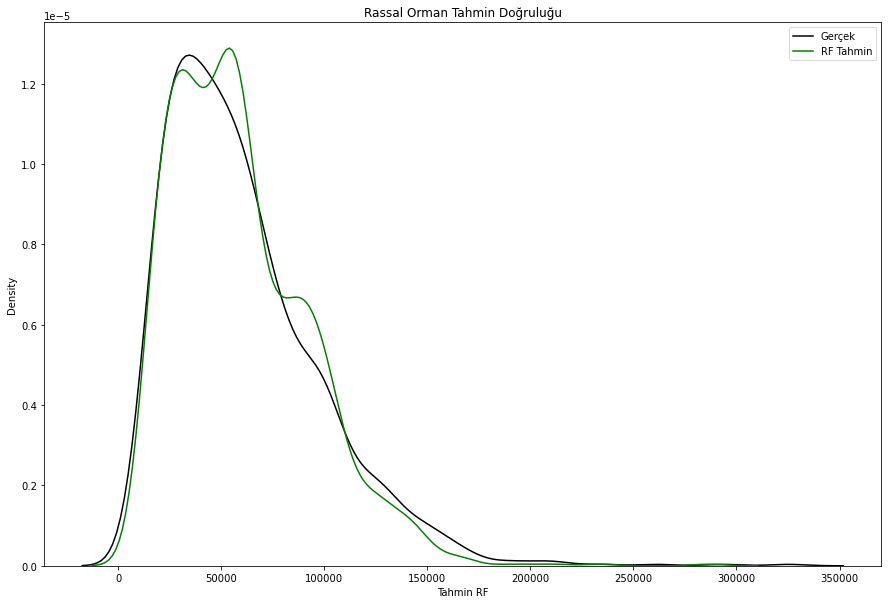

In [154]:
plt.figure(figsize=(15, 10))
plt.title("Lineer Regresyon Tahmin Doğruluğu")
sns.distplot(df_model['Price'], hist=False, color='black', label='Gerçek')
sns.distplot(df_model['Tahmin LR'], hist=False, color='blue', label='LR Tahmin')
plt.legend()
plt.show()


plt.figure(figsize=(15, 10))
plt.title("Karar Ağacı Tahmin Doğruluğu")
sns.distplot(df_model['Price'], hist=False, color='black', label='Gerçek')
sns.distplot(df_model['Tahmin DT'], hist=False, color='orange', label='DT Tahmin',)
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.title("Rassal Orman Tahmin Doğruluğu")
sns.distplot(df_model['Price'], hist=False, color='black', label='Gerçek')
sns.distplot(df_model['Tahmin RF'], hist=False, color='green', label='RF Tahmin')
plt.legend()
plt.show()